# Analysis of the predominant phase

$P_a$ = the expected proportion of A-units activated by a stimulus of a given size<br>
$P_c$ = the conditional probability that an A-unit which responds to a given stimulus ($S_1$), will allso respond to another given stimulus ($S_2$)<br><br>
It can be shown that as the size of the retina is increased,<br>
the number of S-points($N_s$) quickly ceases to be a significant parameter,<br>
and the values of $P_a$ and $P_c$ approach the value that they would have for a retina with infinitely many points.<br><br>
For a large retina, therefore, the equations are as follows:<br><br>($P_a$ approach)<br>
$$
P_a = \sum^{x}_{e=\theta} \sum^{min(y, e-\theta)}_{i=\theta} P(e,i)
$$

$$
where
$$

$$
P(e,i) = 
\begin{equation}
    \begin{pmatrix}
    x \\
    e\\
    \end{pmatrix}
R^{e}(1-R)^{x-e} \times 
    \begin{pmatrix}
    y \\
    i\\
    \end{pmatrix}
\end{equation}
R^{i}(1-R)^{y-i}
$$
and<br>
$R$ = proportion of S-points activated by the stimulus<br>
$x$ = number of excitatory connections to each A-unit<br>
$y$ = number of inhibitory connections to each A-unit<br>
$\theta$ = threshold of A-units<br>
(The quantities $e$ and $i$ are the excitatory and inhibitory components of the excitation received by the A-unit from the stimulus.<br>
If the algebraic sum $\alpha = e+i$ is equal to or greater than $\theta$, the A-unit is assumed to respond)

In [1]:
import numpy as np
from scipy.special import comb

def calculate_Pa(R,x,y,theta):
    def P(e, i):
        term1 = comb(x, e) * (R**e) * ((1-R)**(x-e))
        term2 = comb(y, i) * (R**i) * ((1-R)**(y-i))
        return term1 * term2
    Pa = sum(sum(P(e,i) for i in range(max(theta, e - theta), min(y, e - theta)+1)) for e in range(theta, x+1))
    return Pa

($P_{c}$ approach)
$$
P_{c} = \frac{1}{P_{a}} \sum^{x}_{e= \theta } \sum^{y}_{i={e-\theta}} \sum^{e}_{l_{e}=0} \sum^{i}_{l_{i}=0} \sum^{x-e}_{g_{e}=0} \sum^{y-i}_{g_{i}=0} P(e,i,l_{e}, l_{i}, g_{e}, g_{i})
$$
$$
(e - i - l_{e} + l_{i} + g_{e} - g_i \ge \theta)
$$
$$
where
$$
$$
\begin{equation}
\begin{aligned}
    &P(e,i,l_{e}, l_{i}, g_{e}, g_{i})\\
    &=\binom{x}{e} R^{e}(1 - R)^{x - e} \\
    &\times \binom{y}{i} R^{i}(1 - R)^{y - i} \\
    &\times \binom{e}{l_{e}} L^{l_{e}}(1-L)^{e - l_{e}} \\
    &\times \binom{i}{l_{i}} L^{l_{i}}(1-L)^{i - l_{i}} \\
    &\times \binom{x - e}{g_{e}} G^{g_{e}}(1-G)^{x - e - g_{e}} \\
    &\times \binom{y - i}{g_{i}} G^{g_{i}}(1-G)^{y - i - g_{i}} \\
\end{aligned}
\end{equation}
$$
and<br>
$L$ = proportion of the S-points illuminated by the first stimulus, $S_1$, which are not illumintated by $S_2$<br>
$G$ = proportion of the residual S-set (left over from the first stimulus) which is included in the second stimulus($S_2$)
$$$$

In [9]:
from tqdm import tqdm

def calculate_Pa(R,x,y,theta):
    def P(e, i):
        term1 = comb(x, e) * (R**e) * ((1-R)**(x-e))
        term2 = comb(y, i) * (R**i) * ((1-R)**(y-i))
        return term1 * term2
    Pa = sum(sum(P(e,i) for i in range(max(theta, e - theta), min(y, e - theta)+1)) for e in range(theta, x+1))
    return Pa
    
def calculate_Pc(x, y, theta, R, L, G, Pa):
    def P(e,i,le, li, ge, gi):
        term1 = comb(x, e) * (R**e) * ((1 - R)**(x - e))
        term2 = comb(y, i) * (R**i) * ((1 - R)**(y - i))
        term3 = comb(e, le) * (L**le) * ((1 - L)**(e - le))
        term4 = comb(i, li) * (L**li) * ((1 - L)**(i - li))
        term5 = comb(x - e, ge) * (G**ge) * ((1 - G)**(x - e - ge))
        term6 = comb(y - i, gi) * (G**gi) * ((1 - G)**(y - i - gi))
        return term1 * term2 * term3 * term4 * term5 * term6
    
    Pa = calculate_Pa(R, x, y, theta)
    Pc = 0
    for e in tqdm(range(theta, x + 1)):
        for i in range(e - theta, y + 1):
            for le in range(0, e + 1):
                for li in range(0, i + 1):
                    for ge in range(0, x - e + 1):
                        for gi in range(0, y - i + 1):
                            if (e - i - le + li + ge - gi) >= theta:
                                Pc+= P(e,i,le, li, ge, gi)
                                
    return Pc/ Pa if Pa != 0 else 0

In [18]:
# Example numbers

x = 10   # number of excitatory connections
y = 10   # number of inhibitory connections
theta = 3  # threshold
R = 0.5  # proportion of S-points activated by the stimulus
L = 0.3  # proportion for L
G = 0.4  # proportion for G

Pa = 0.6  # Example value for Pa, to be computed separately as per your model

Pc = calculate_Pc(x, y, theta, R, L, G, Pa)
Pc

100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 40.10it/s]


1.8039399712510817

The minimum value of $P_c$ is equal to 
$$
P_{c_{min}} = (1 - L)^{x}(1 - G)^{y}
$$

In [11]:
def Pc_min(L, x, G, y):
    term1 = (1 - L)**x
    term2 = (1 - G)**y
    return term1 * term2

# Mathematical Analysis of Learning in the Perception

Probability that the perceptron will show a bias towards the "correct" response in preference is called $P_r$.

Probability that the perceptron will give the correct response for the class of stimuli which is represented.<Br>This probability is called $P_g$, the probability of correct generalization.<br>
$$P = P(N_{a_{r}} > 0) \cdot \phi(Z)$$
$$where$$
$$P(N_{a_{r}} > 0) = 1 - (1 - P_{a})^{N_{c}}$$
<div align = "center">
    $\phi (Z)$ = normal curve integral from $-\infty$ to $Z$
</div>
$$and$$
$$
Z=\frac{c_1n_{s_{r}} + c_{2}}{\sqrt{{c_3n_{s_{r}}}^2 + c_4n_{s_{r}}}}
$$

In [19]:
from scipy.stats import norm

def calculate_P(Nc, Pa, c1, c2, c3, c4, nsr):
    P_Nar_greater_than_0 = 1 - (1 - Pa) ** Nc
    Z = (c1 * nsr + c2) / np.sqrt((c3 * nsr) ** 2 + c4 * nsr)
    phi_Z = norm.cdf(Z)

    P = P_Nar_greater_than_0 * phi_Z
    return P

In ideal environment, consisting of randomly placed points of illumination, where there is no attempt to classify stimuli according to intrinsic similarity.<br>
Thus, in a typical learning experiment, we might show the perceptron 1,000 stimuli made up of random collections of illuminated retinal points,<br>and we might arbitrarily reinforce $R_{1}$ as the "correct" response for the first 500 of these, and $R_{2}$ for the first 500.<br><br>
This environment is "ideal" only in the sense that we speak of an ideal gas in physics; it is a convenient artifact for purposes of analysis, and does not lead to the best performance from the perceptron.<br>
In the ideal environment situation, the constant $c_{1}$ is always equal to zero, so that, in the case of $P_{g}$ (where $c_{2}$ is also zero), the value of $Z$ will be zero, and $P_{g}$ can never be any better than the random expectation of 0.5.<br>
The evaluation of $P_{r}$ for these conditions, however, throws some interesting light on the differences between the alpha, beta, and gamma systems.<br><br>
**First consider the $\alpha$-system**, which has the simplest dynamics of the three.<br>
In this system, whenever an A-unit is active for one unit of time, it gains one unit of value.<br>
We will assume an experiment, initially, in which $N_{a_{r}}$ (the number of stimuli associated to each response) is constant for all responses.<br>
In this case, for the sum system,<br>

\begin{cases} 
    c_1 = 0 \\
    c_2 = (1-P_a)N_e \\
    c_3 = 2P_aw \\
    c_4 \approx 0 \\
\end{cases}

where $w = $ the fraction of responses connected to each A-unit.<br>If the source-sets are disjunct, $w = 1 / N_{R},$ where $N_{R}$ is the number of responses in the system.<br>
For the $\mu$-system,<br>

\begin{cases} 
    c_1 = 0 \\
    c_2 = (1-P_a)N_e \\
    c_3 = 0 \\
    c_4 = 2w \\
\end{cases}

The reduction of $c_2$ to zero gives the $\mu$-system a definite advantage over the $\Sigma$-system.<br>
<br> if $n_{a_r}$ instead of being fixed, is treated as a random variable, so that the number of stimuli associated to each response is drawn separately from some distribution, then the performance of the $\alpha$-system is considerably poorer than the above eqquations indicate.<br>
Under these conditions, the constants for the $\mu$-system are

\begin{cases} 
    c_1 = 0 \\
    c_2 = 1-P_a \\
    c_3 = 2{P_{a}}^{2}{q}^2 [\frac{(wN_{R}-1)^2}{N_{R}-2}] \\
    c_4 = \frac{2(1-P_a)N_{R}}{(1-w_c)N_{A}} \\
\end{cases}

$where$
<div align="center">
    <p align="left">
        $q =$ ratio of $\sigma_{n_{S_r{r}}}$ to $\overleftrightarrow{n}_{S_r}$<br>
        $N_R = $ number of responses in the system<br>
        $N_A = $ number of A-units in the system<br>
        $w_c = $ proportion of A-units common to $R_1$ and $R_2$<br>
    </p>
</div>

For this equation (and any others in which $n_{s_r}$ is treated as a random variable), it is necessary to define $n_{s_r}$ in the equation above (in `calculate_P`) as the expected value of this variable, over the set of all responses.<br><br>

For the $\beta$-system, there is an even greater deficit in performance, due to the fact that the net value continues to grow regardless of what happens to the system.<br>
The large net values of the subsets activated by a stimulus tend to amplilfy small statistical differences, causing an unreliable performance.<br>
The constants in this case (again for the $\mu$-system) are
\begin{cases} 
    c_1 = 0 \\
    c_2 = (1-P_a)N_e \\
    c_3 = 2(P_aN_eqw{N_{R}}^2)^2 \\
    c_4 = 2(1 - P_a)wN_{R}N_e \\
\end{cases}
In both the $\alpha$ and $\beta$ systems, performance will be poorer for the sum-discriminating model than for the mean-discriminating case.<br><br>
In the $\gamma$-system, however, it can be shown that $P_{r(\Sigma)} = P_{r(\mu)}$; i.e., it makes no difference in performance whether the $\Sigma$-system or $\mu$-system is used.<br>
Moreover, the constants for the $\gamma$-system, with variable $n_{s_r}$ are identical to the constants for the alpha $\mu$-system, with $n_{s_{r}}$ fixed.

Replacing the "Ideal environment" assumptions with a model for a "differentiated environment" in which several distinguishable classes of stimuli are present.<br>
If we then design an experiment in which the stimuli associated to each response are drawn from a different class, then the learning curves of the perceptron are drastically altered.<br>
The most important difference is that the constant $c_1$ (the coefficient of $n_{s_r}$ in the numerator of $Z$) is no longer equal to zero,<br>so that the equation now has a non random asymtote (the probability of correct generalization), where $c_2 = 0$, the quantity $Z$ remains greater than zero, and $P_g$ actually approaches the same asymtote as $P_r$.<br>
Thus the equation for the perceptron's performance after infinite experience with each class of stimuli is identical for $P_r$ and $P_g$:
$$
P_{r_\infty} = P_{g_\infty} = [1-(1-P_a)^{N_e}] \times \phi (\frac{c_1}{\sqrt{c_3}})
$$
This means that in the limit it makes no difference whether the perceptron has seen a particular test stimulus before or not;<br>if the stimuli are drawn from a differentiated environment, the performance will be equally good in either case.

In [ ]:
def P_inf(P_a, N_e, c_1, c_3):
    term1 = 1- (1-P_a)**N_e
    Z = c_1 / np.sqrt(c_3)
    phi_Z = norm.cdf(Z)
    return term1 * phi_Z

The equation for $P_r$, for the sum-discriminating version of an $\alpha$-perceptron, in a differentiated environment where $n_{s_r}$ is fixed for all responses, will have the following expressions for the four coefficients:
\begin{cases} 
c_1 = P_aN_e(P_{c11} - P_{c12}) \\
c_2 = P_aN_e(1-P_{c11}) \\
\begin{equation}
\begin{aligned}
    c_3 &= \sum_{r=1,2} P_a (1 - P_a) N_e\\
    &\times \left[ P_{c1_r}^2 + \sigma_3^2(P_{c1_r}) \right. \\
    &\quad + \sigma_j^2(P_{c1r} + (wN_{R} - 1)^2) \\
    &\quad \times (P_{c1_x} + \sigma_S^2 (P_{c1_x}) \\
    &\quad + \sigma_j^2(P_{c_{rx}})) + 2(wN_{R} - 1) \\
    &\quad \left. (P_{c1_r}P_{c1_x}) \right] + P_a^2 N_e^2 \\
    &\quad \times \left[ \sigma_S^2(P_{c1_r}) + (wN_{R} - 1)^2 \right. \\
    &\quad \times \sigma_S^2(P_{c1_r}) + (wN_{R} - 1)^2 \\
    &\quad \left. \times \sigma_S^2(P_{c1_x}) + 2(wN_{R} - 1) \epsilon \right] \\
    c_4 &= \sum_{r=1,2} P_a N_e \left[ P_{c1_r} - P_{c1_r}^2 \right. \\
    &\quad - \sigma_S^2(P_{c1_r}) - \sigma_j^2(P_{c1_r}) \\
    &\quad \left. + (wN_R - 1)(P_{c1_x} - P_{c1_x}^2 - \sigma_j^2(P_{c1_x})) \right]
\end{aligned}
\end{equation}
\end{cases}

$where$<br>
$\sigma_S^2(P_{c1_r})$ and $\sigma_S^2(P_{c1_x})$ represent the variance of $P_{c1_r}$ and $P_{c1_x}$ measured over the set of possible test stimuli, $S_t$<br>$\sigma_j^2(P_{c1_r}$ and $\sigma_j^2(P_{c1_x})$ represent the variance of $P_{c1_r}$ and $P_{c1_x}$ measured over the set of all A-units, $a_j$.<br>
$\epsilon = $ covariance of $P_{c1_r}P_{c1_x}$, which is assumed to be negligible.

For the mean-discriminating system, the coefficients are:

\begin{cases} 
c_1 = (P_{c11} - P_{c12}) \\
c_2 = (1-P_{c11}) \\
\begin{equation}
\begin{aligned}
    c_3 &= \sum_{r=1,2} \left[ \frac{1}{P_a (N_e - 1)} - \frac{1}{N_e - 1} \right] \\
    &\quad \times \left[ \sigma_j^2(P_{c1_r}) + (wN_{R} - 1)^2 \\
    \times \sigma_j^2(P_{c1_r}) \right]\\
    &\quad + \left[ \sigma_S^2(P_{c1_r}) + (wN_{R} - 1)^2
    \sigma_S^2(P_{c1_x}) \right] \\
    c_4 &= \sum_{r=1,2} \frac{1}{P_a N_e} \left[ P_{c1_r} - P_{c1_r}^2 - \sigma_S^2(P_{c1_r}) - \sigma_j^2(P_{c1_r}) \right. \\
    &\quad + (wN_R - 1)\left(P_{c1_x} - P_{c1_x}^2 - \sigma_S^2
    (P_{c1_x}) - \sigma_j^2(P_{c1_x}) \right) \Bigg]
\end{aligned}
\end{equation}
\end{cases}

# Training Perceptron

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
def step_function(x):
    if x < threshold:
        return 0
    else:
        return 1
        

In [5]:
def gen_training_data(data_point):
    x1 = np.random.random(data_point)
    x2 = np.random.random(data_point)
    y = (x1 + x2 > 1).astype(int)
    training_set = [((x1[i], x2[i]), y[i]) for i in range(len(x1))]
    return training_set

In [6]:
threshold = 0.5
w = np.array([0.3, 0.9])
lr = 0.1
data_point = 100
epoch = 10
training_set = gen_training_data(data_point)

In [7]:
training_set[0:5]

[((0.39757906646406105, 0.6434861790717605), 1),
 ((0.3657188310229632, 0.7770164800800017), 1),
 ((0.13085166801317094, 0.6924381804194663), 0),
 ((0.702212491169745, 0.5191048934361544), 1),
 ((0.15578912141759715, 0.2940184490645751), 0)]

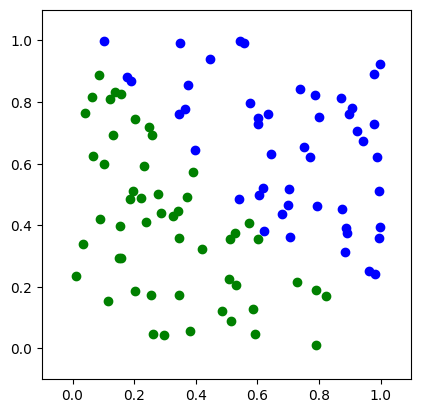

In [9]:
plt.figure(0)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

for x, y in training_set:
    if y == 1:
        plt.plot(x[0], x[1], 'bo')
    else:
        plt.plot(x[0], x[1], 'go')

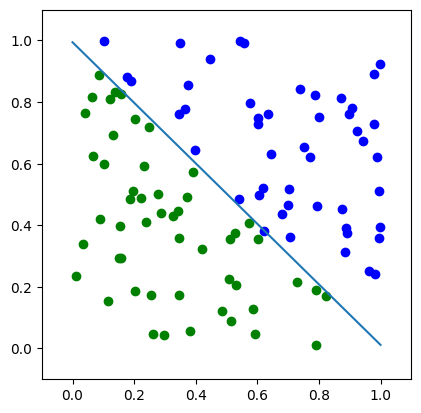

In [11]:
%matplotlib inline
from time import sleep

plt.figure(0)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

xx = np.linspace(0, 1, 50)
for i in range(epoch):
    cnt = 0
    for x, y in training_set:
        clear_output(wait=True)
        u = sum(x*w)
        error = y-step_function(u)
        for index, value in enumerate(x):
            w[index] = w[index] + lr*error*value

        for xs, ys in training_set[0:cnt]:
            plt.ylim(-0.1, 1.1)
            plt.xlim(-0.1, 1.1)
            ax = plt.gca()
            ax.set_aspect('equal', adjustable='box')
            
            if ys == 1:
                plt.plot(xs[0], xs[1], 'bo')
            else:
                plt.plot(xs[0], xs[1], 'go')
        yy = -w[1]/w[0] * xx + threshold/w[0] # <== w[0] * yy + w[1] * xx = threshold
        plt.plot(xx, yy)
        plt.show()
        cnt = cnt  + 1
        sleep(0.01)

In [12]:
w[1]

0.4940996111484838

In [13]:
w[0]

0.5029089462029646

In [14]:
threshold

0.5

In [ ]:
yy = -w[1]/w[0] * xx + threshold/w[0]

In [ ]:
y = -1 * x + 1